In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Scaler = StandardScaler()
X_std = Scaler.fit_transform(X)

In [29]:
number = [2,3,4,5,6]
kmeans_clusters = []
for i in number:
    k_means = KMeans(n_clusters=i, random_state=123)
    k_means.fit(X_std)
    y_pred = k_means.predict(X_std)
    kmeans_clusters.append(y_pred)

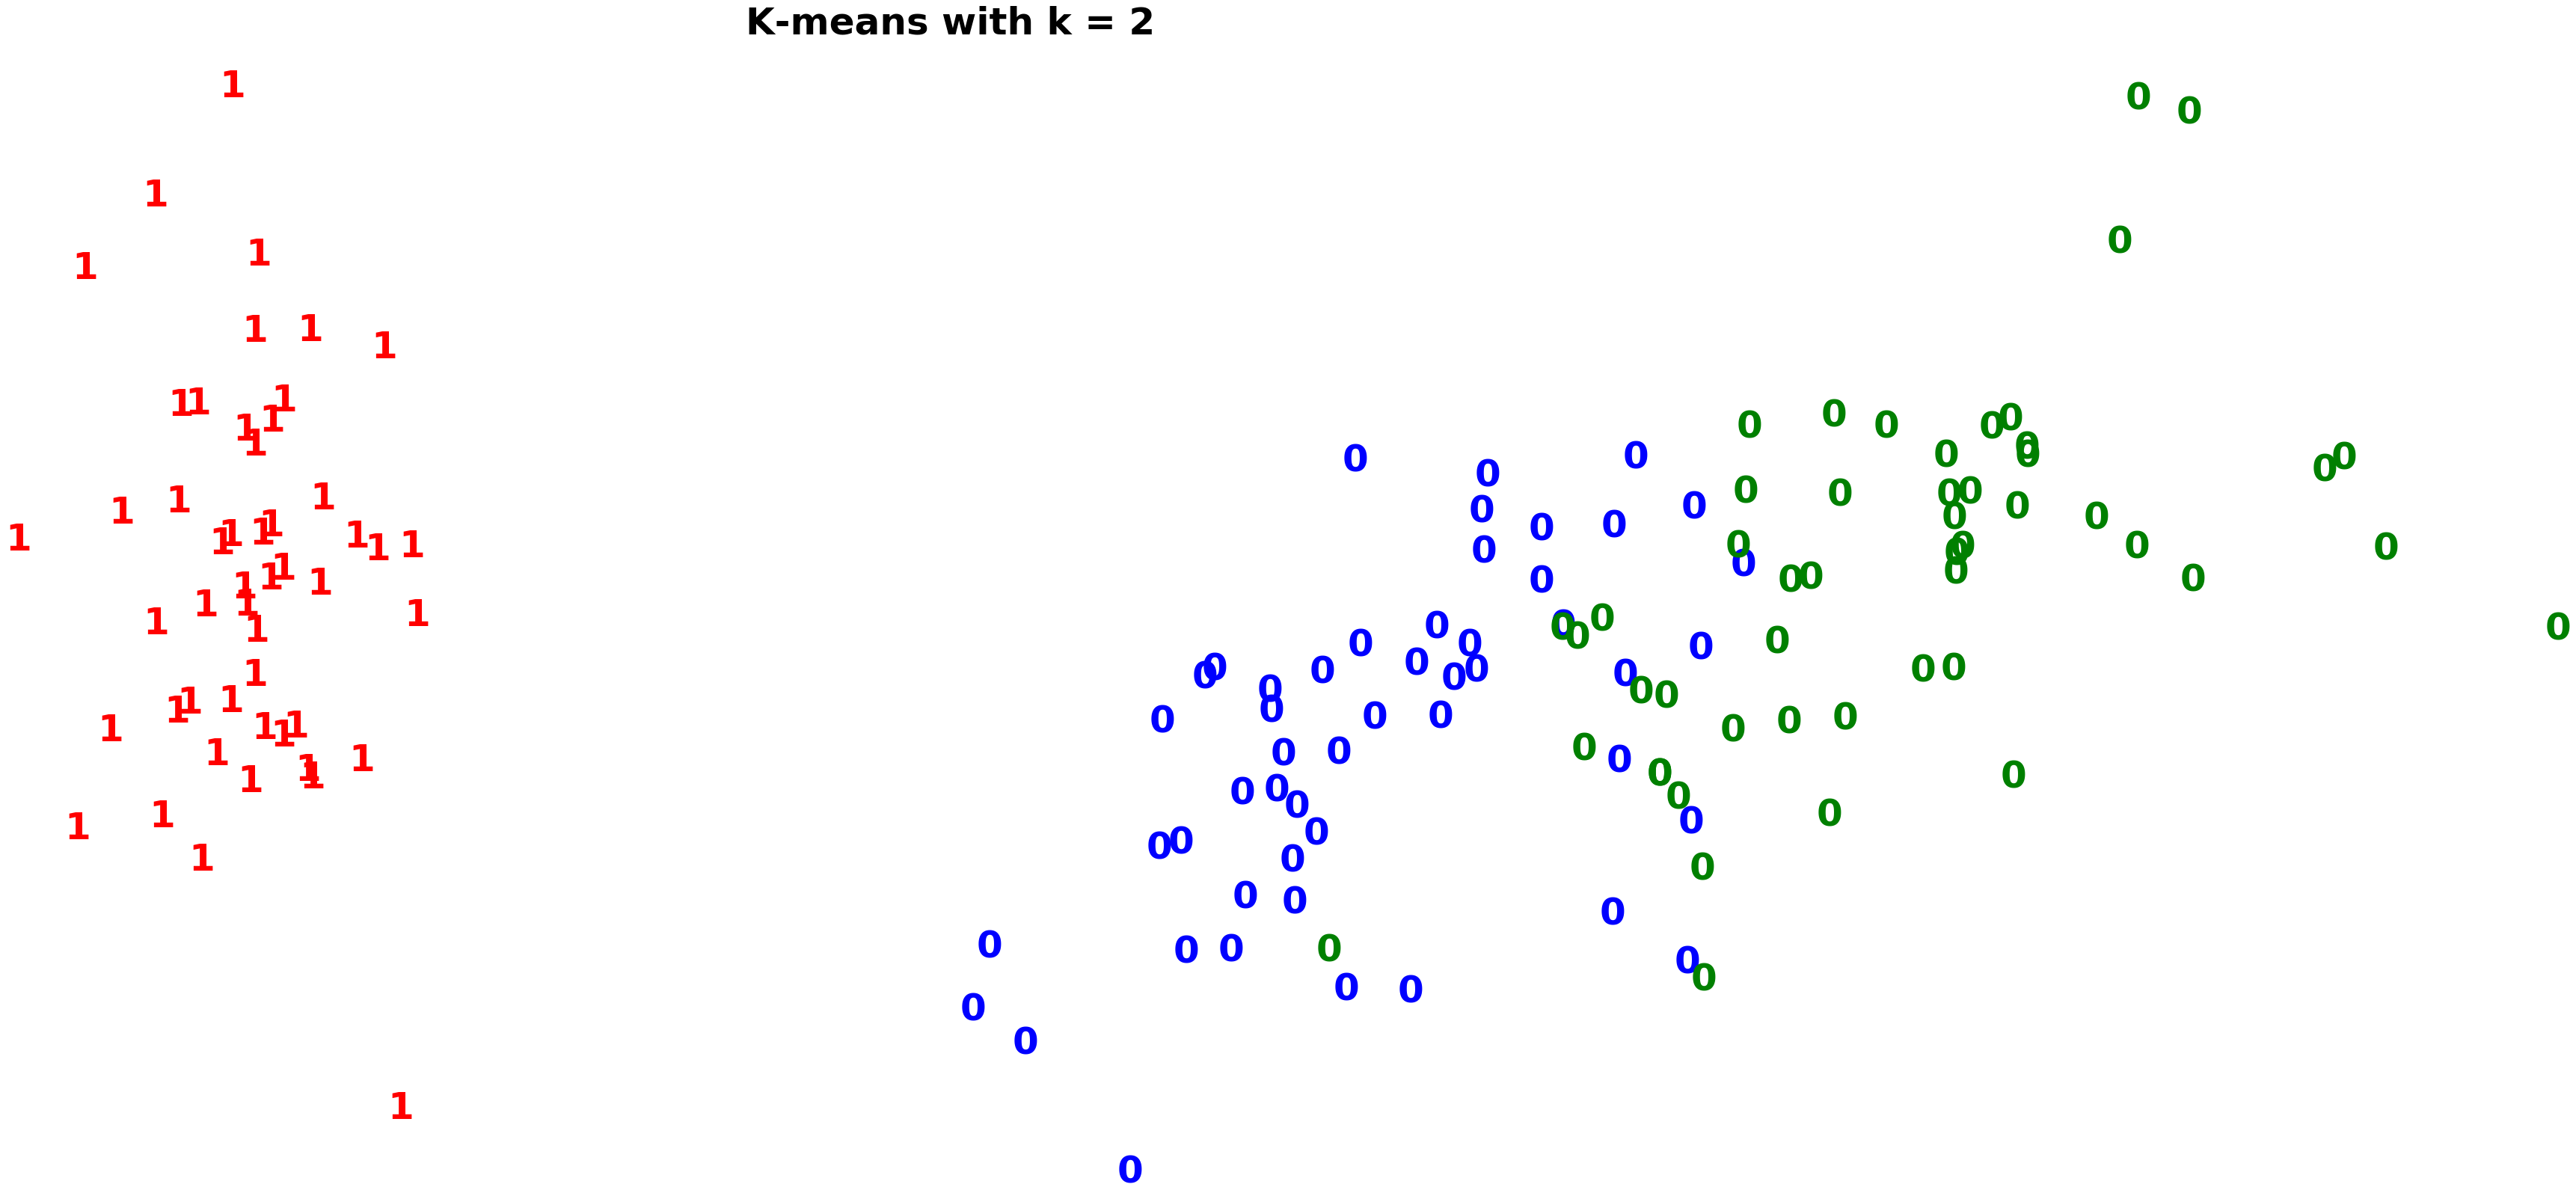

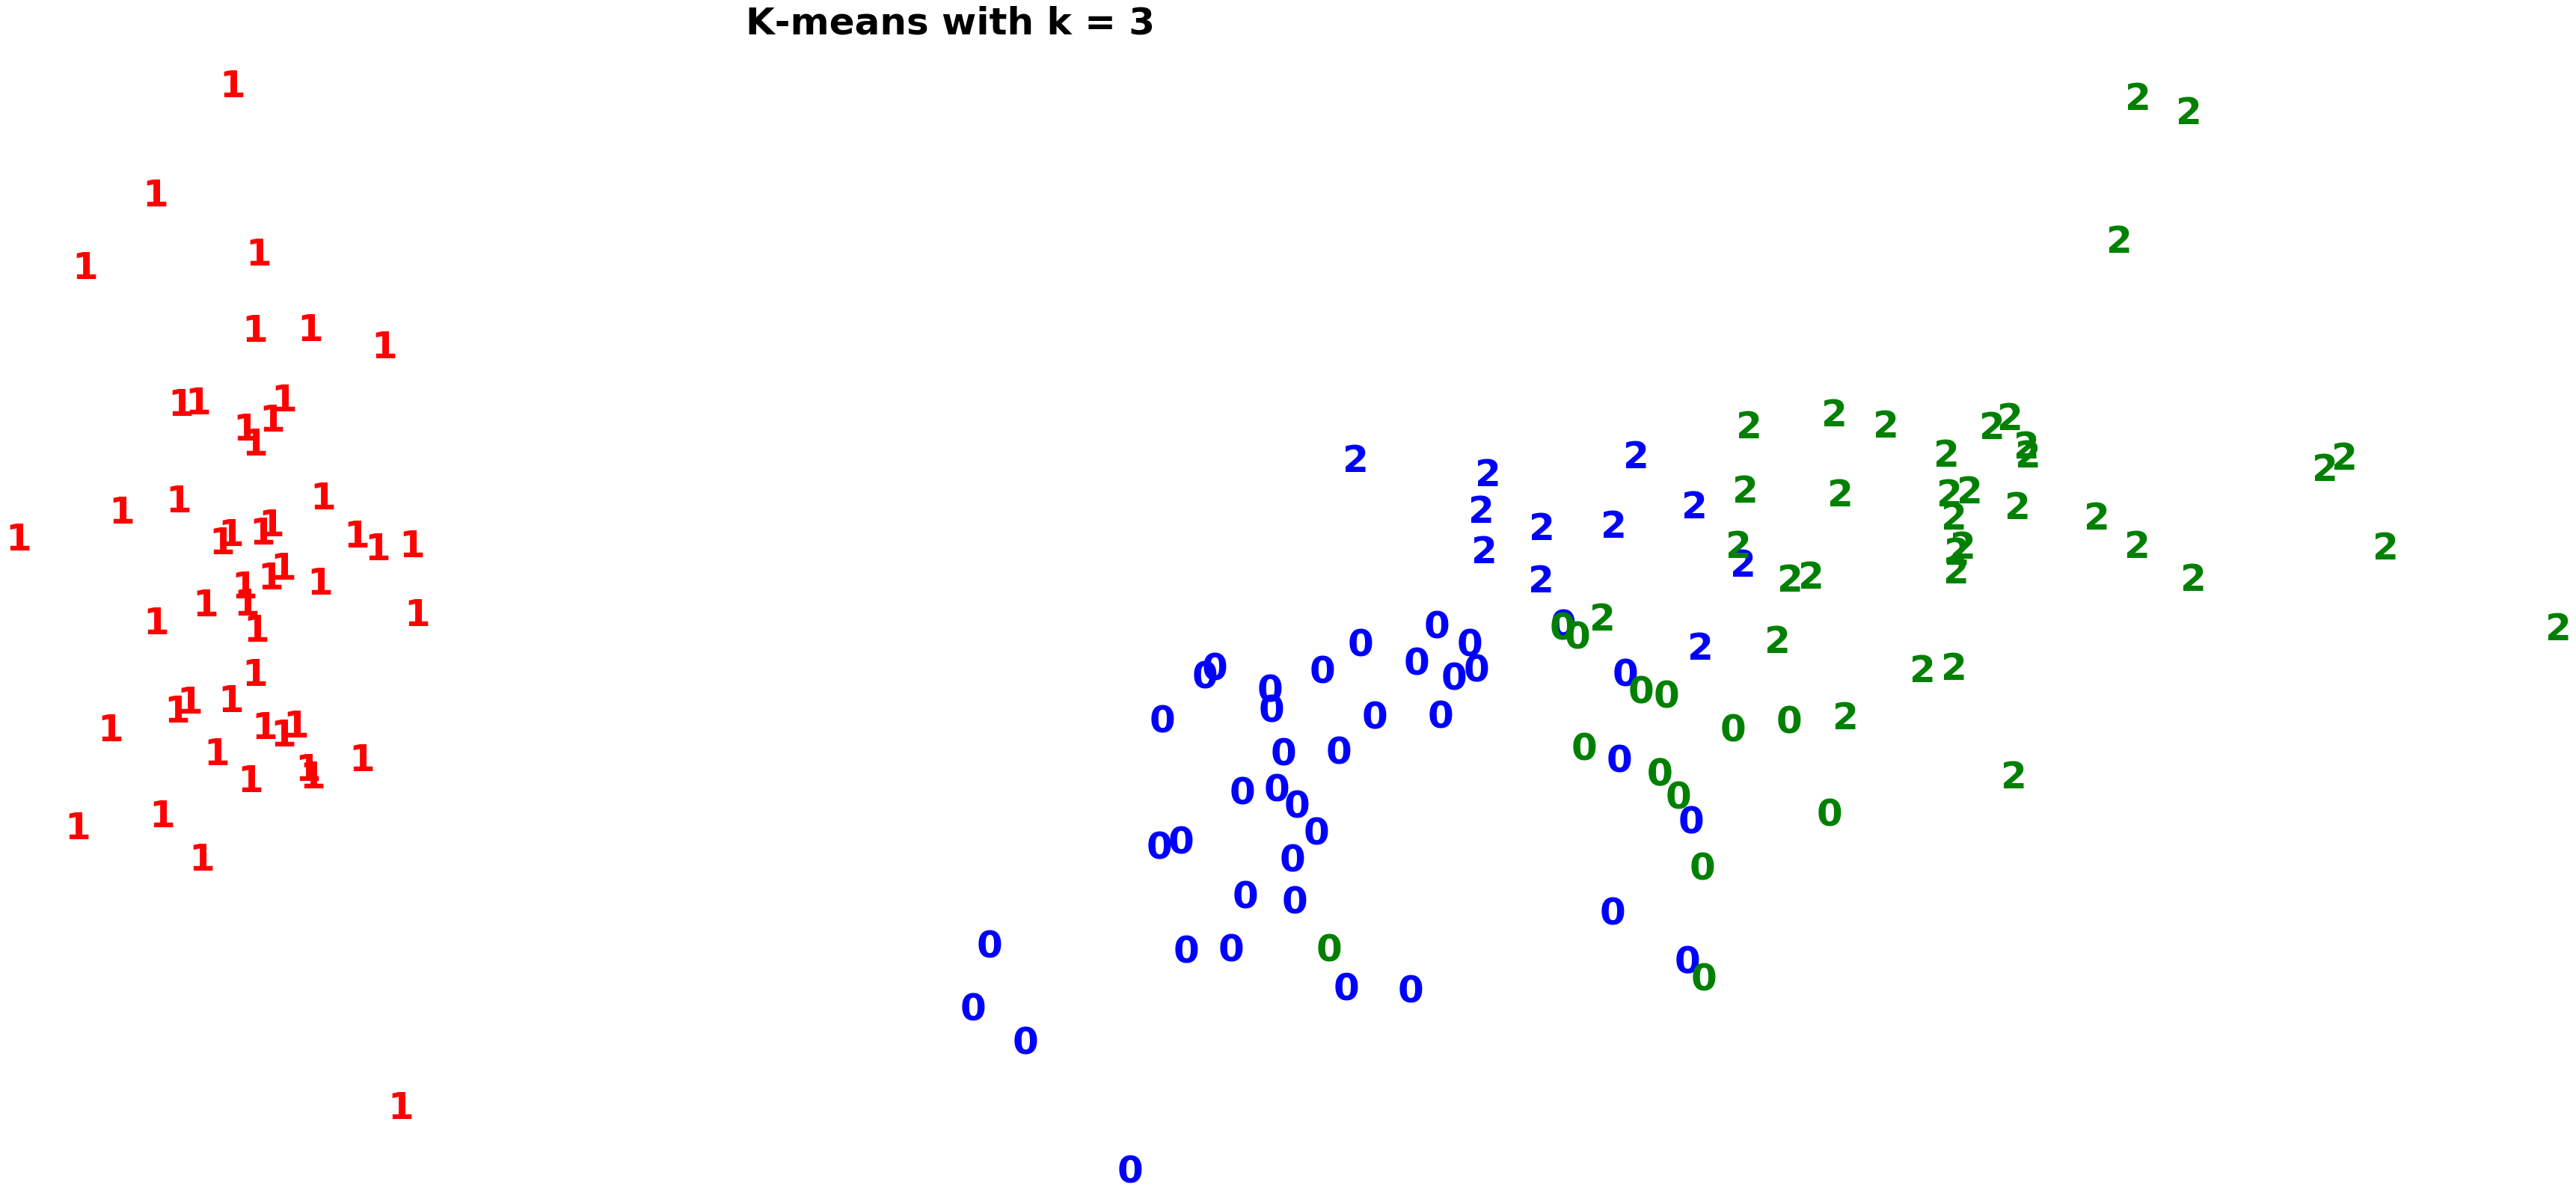

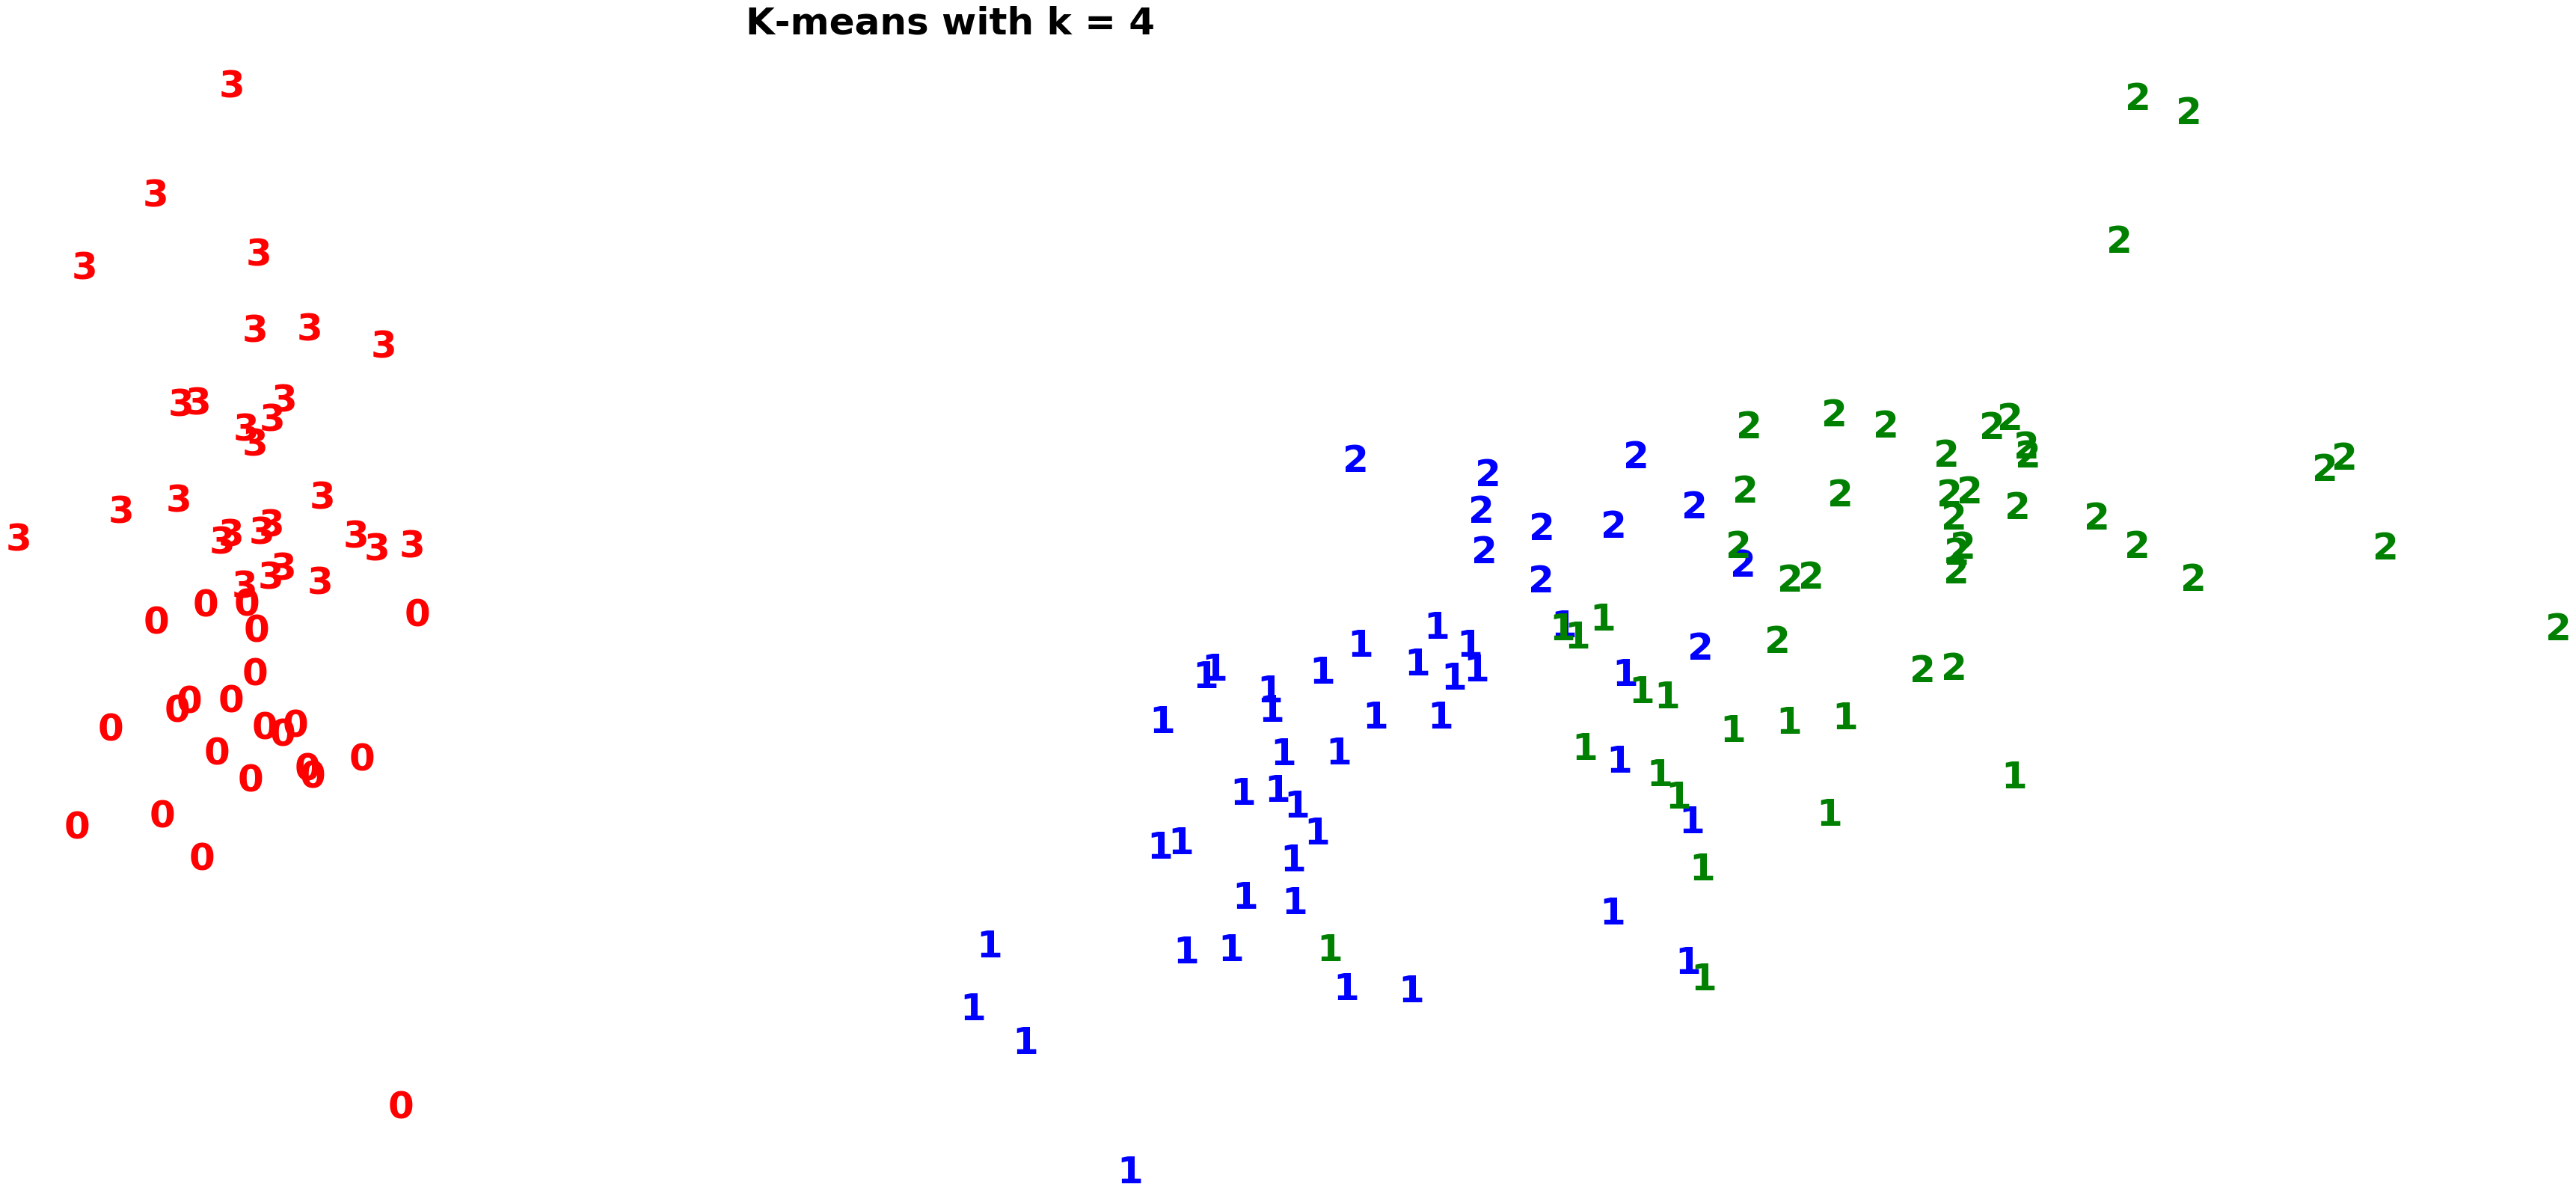

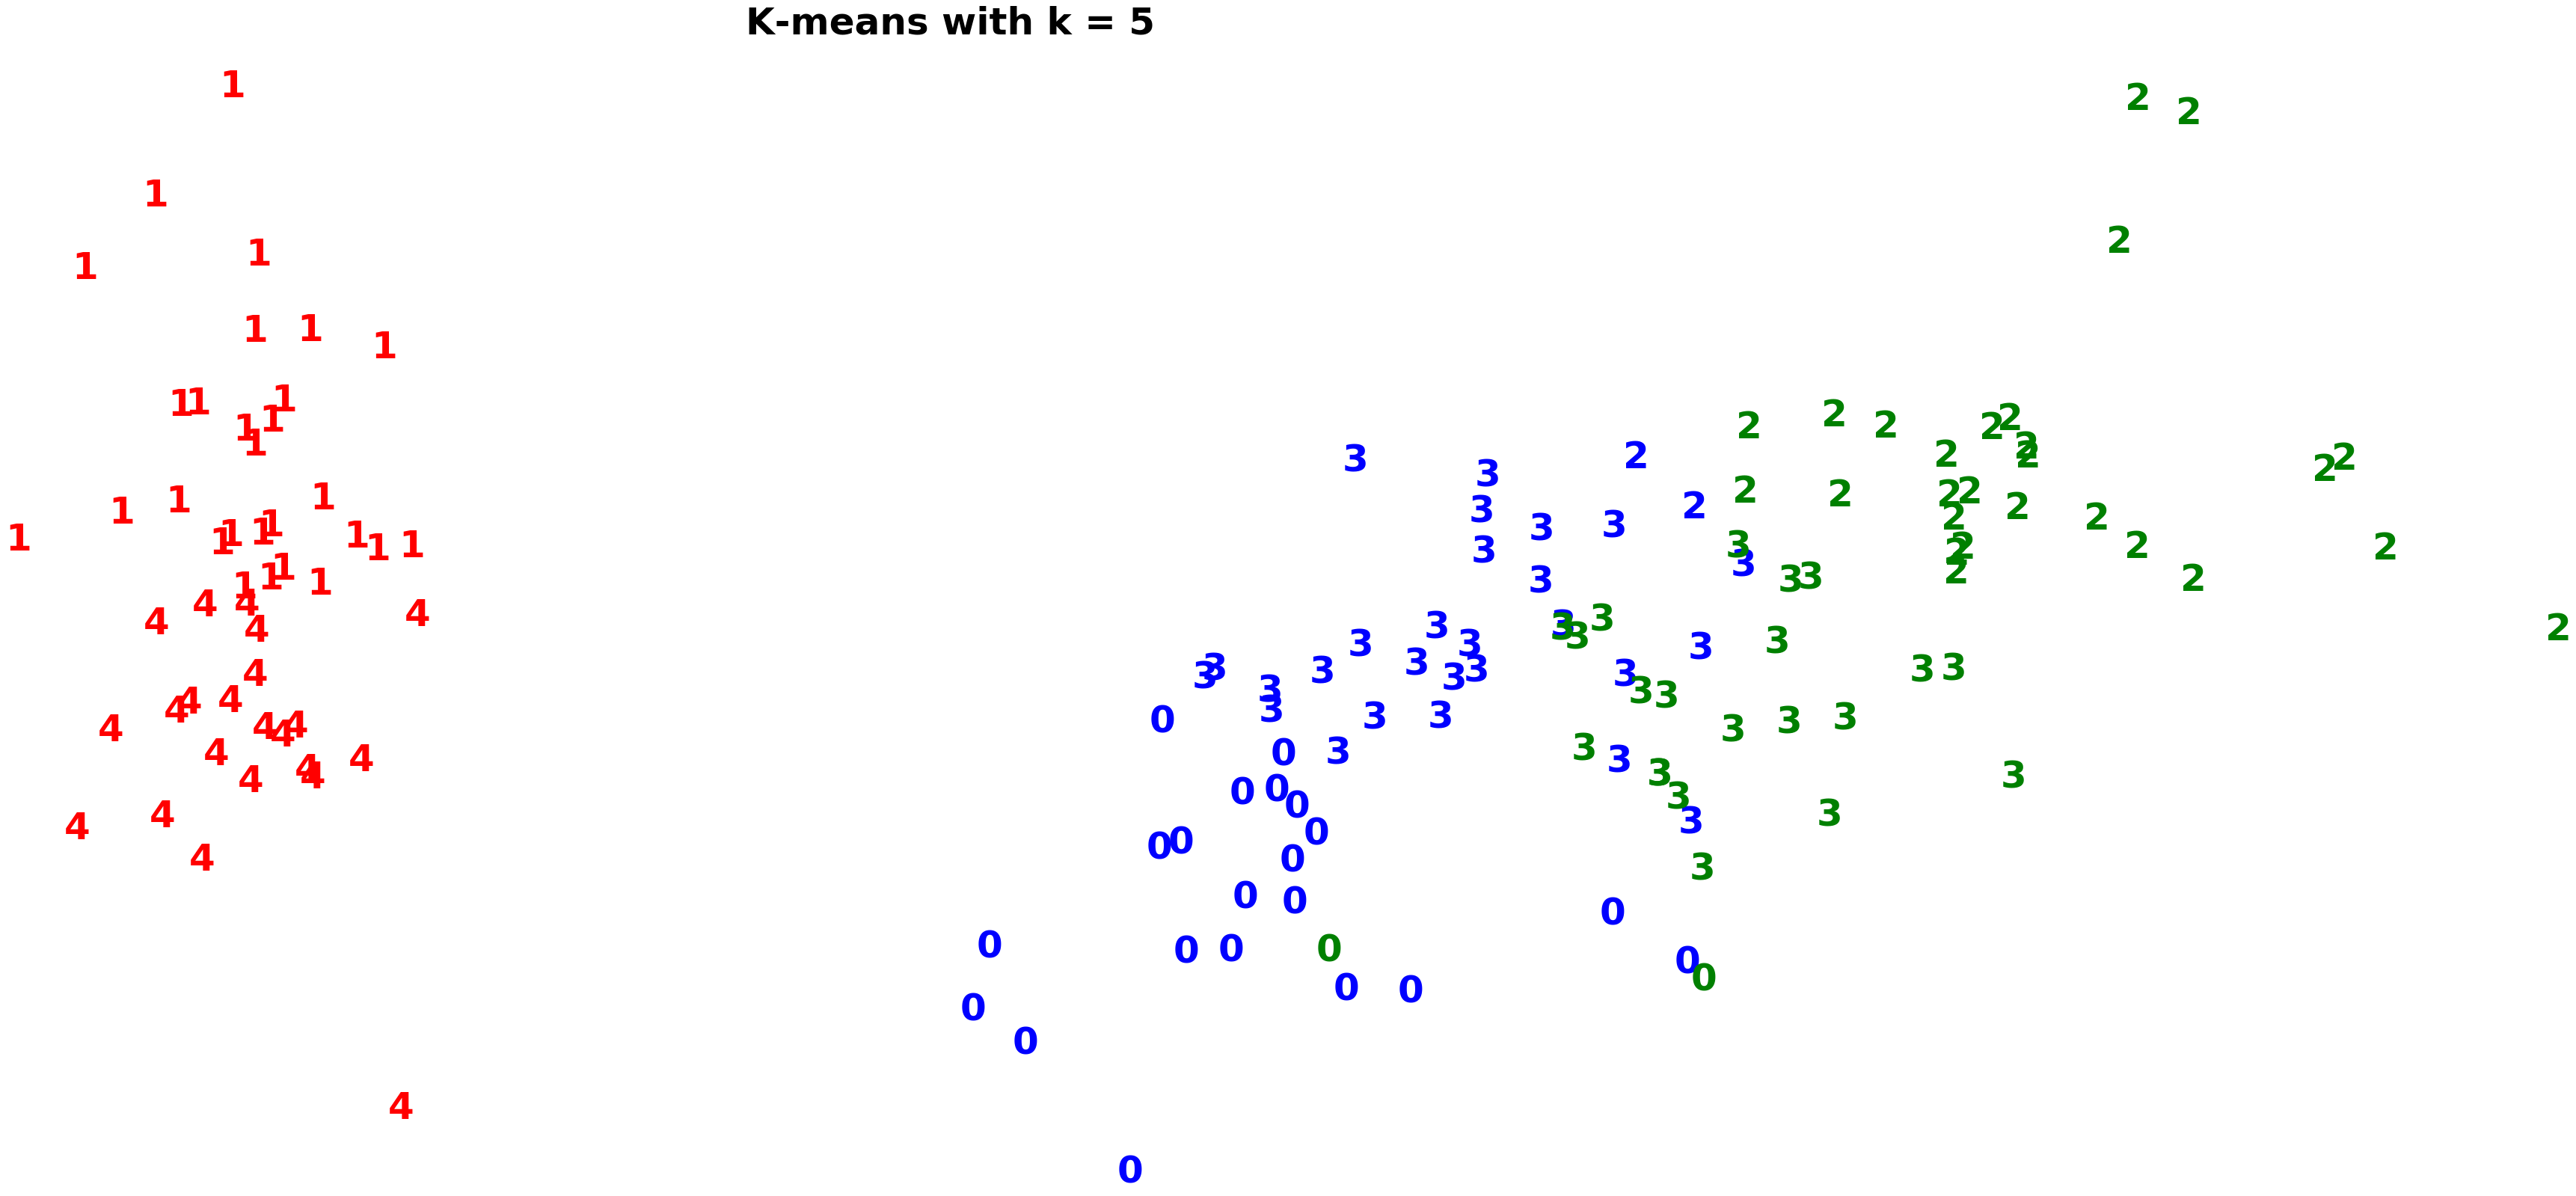

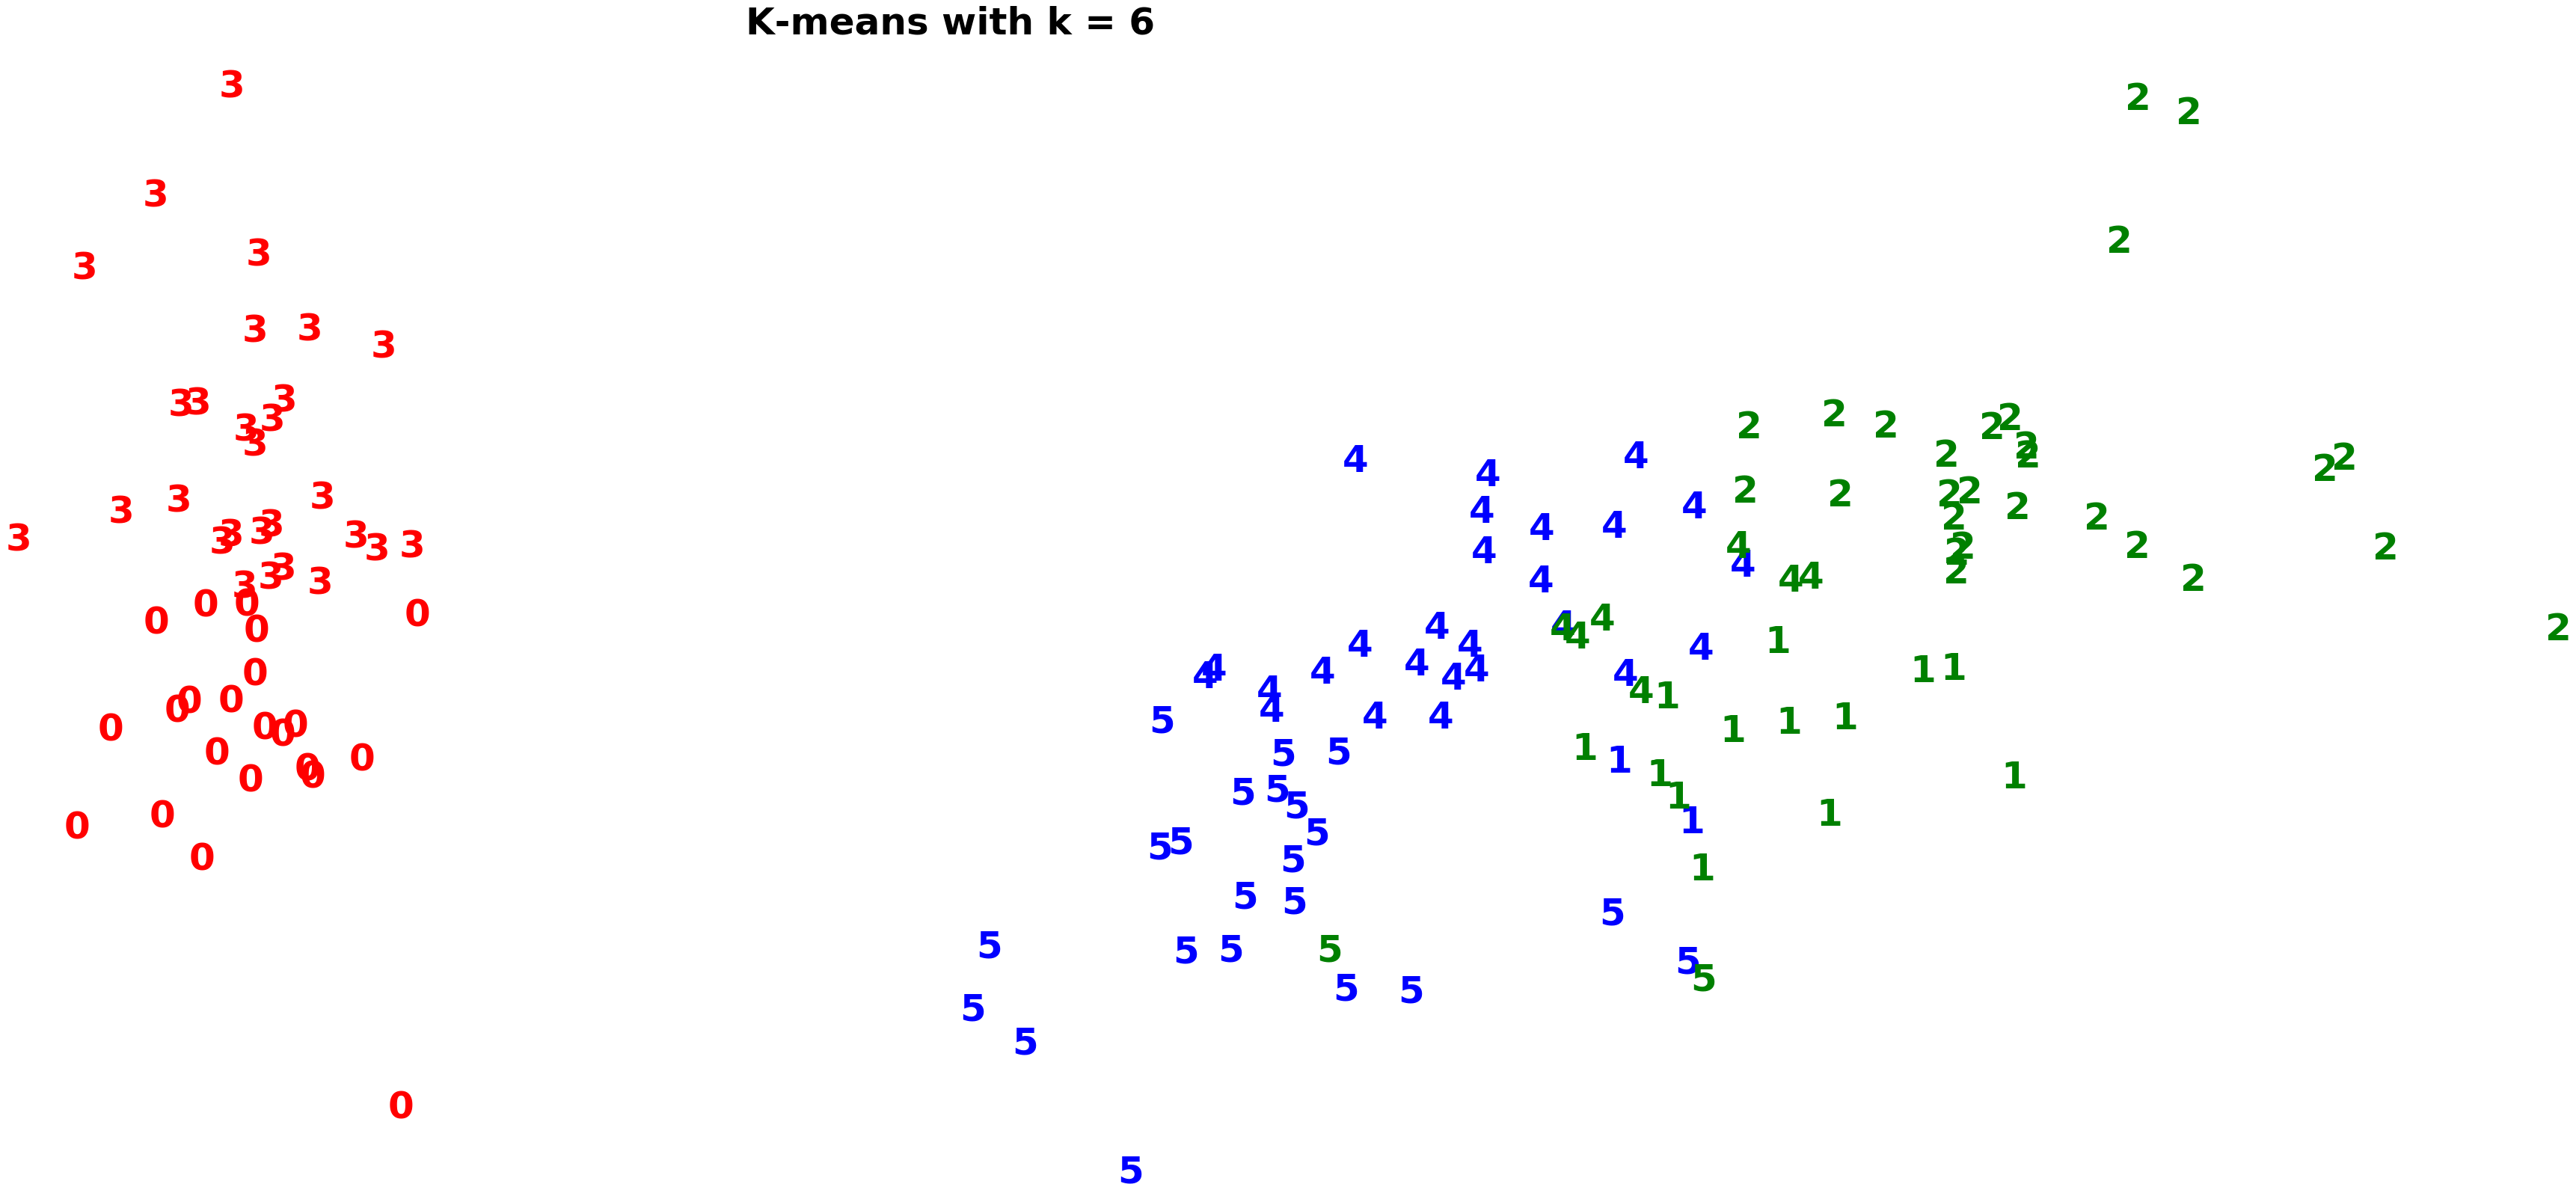

In [51]:
pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(-1, 3, "K-means with k = {}".format(number[i]),
              fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i,0], pca[i,1], str(solution[i]), color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50})
    
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data = pd.read_sql_query('select * from heartdisease', con=engine)
engine.dispose()

In [55]:
X = data.iloc[:, :13]
y = data.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [62]:
X_std = Scaler.fit_transform(X)

k_means = KMeans(n_clusters=2, random_state=123)
k_means.fit(X_std)
y_pred = k_means.predict(X_std)

In [63]:
pca = PCA(n_components=2).fit_transform(X_std)

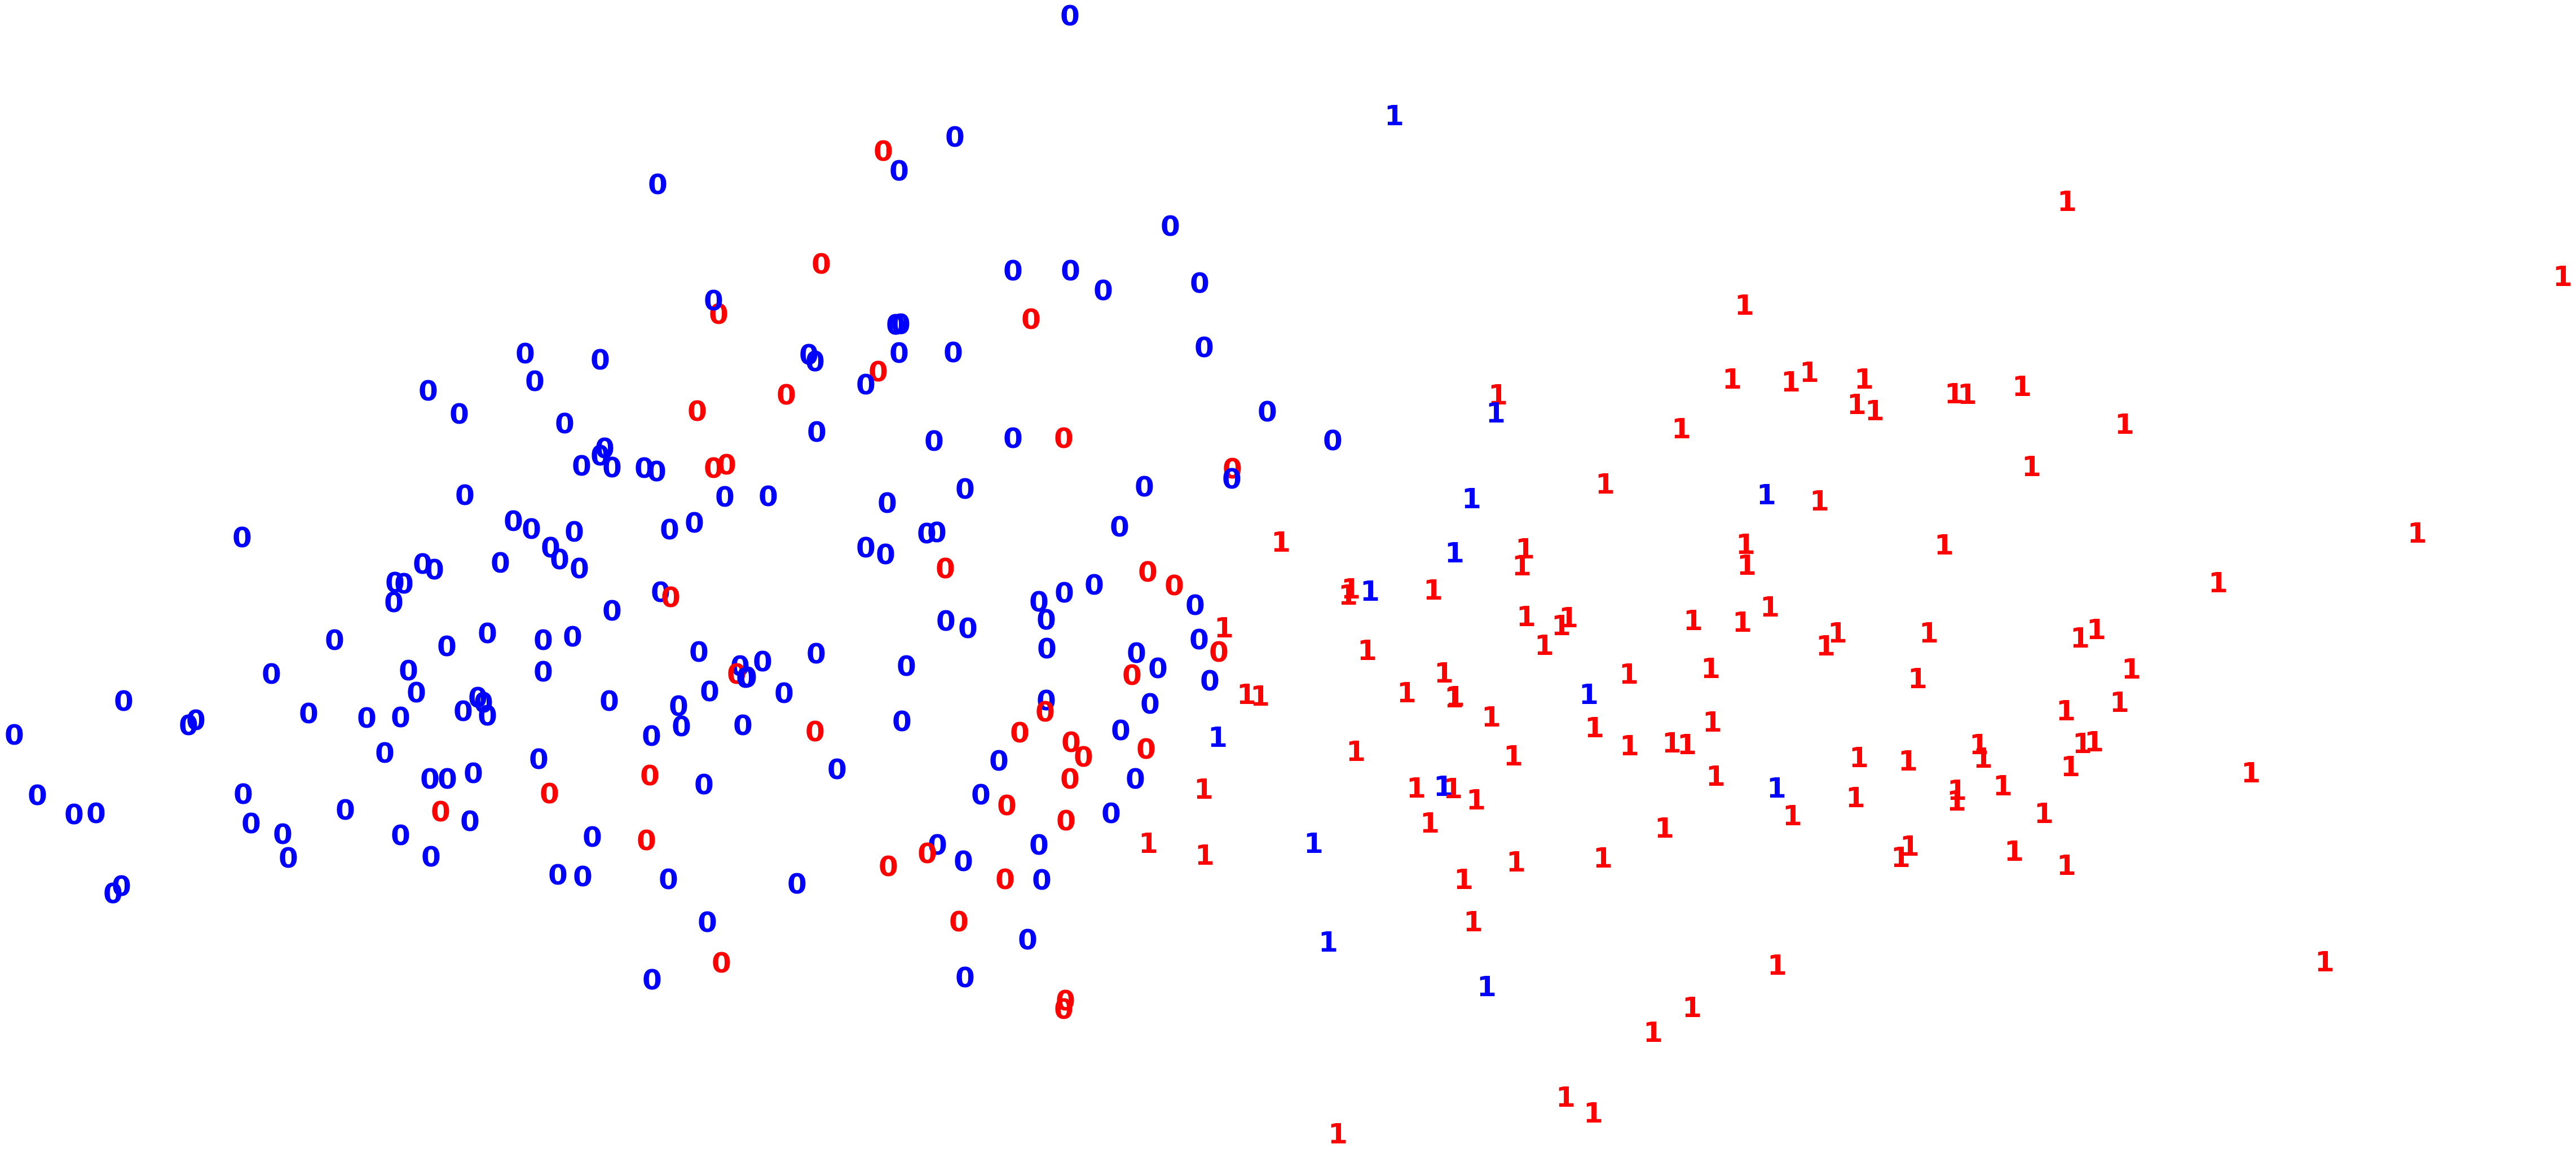

In [71]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]), color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50})
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

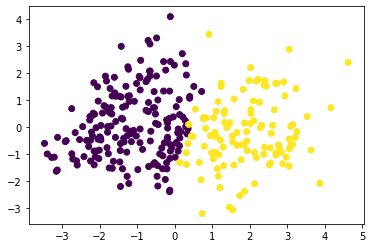

In [69]:
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.show()

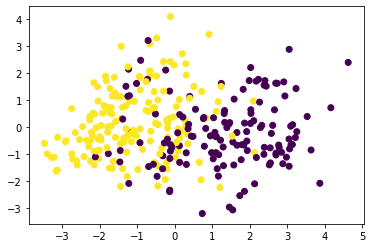

In [70]:
plt.scatter(pca[:, 0], pca[:, 1], c=y)
plt.show()